In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet_v2 import ResNet152V2, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#from tensorflow.keras.applications.mobilenet_v3 import MobileNetV3
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/dataset/Training'
valid_path = '/content/drive/MyDrive/dataset/Testing'

In [ ]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/dataset/Training/*')

In [ ]:
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 50,
                                                 class_mode = 'categorical')

Found 1244 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Testing',
                                            target_size = (224, 224),
                                            batch_size = 50,
                                            class_mode = 'categorical')

Found 539 images belonging to 3 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-14-89113a27acbd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
25/25 [==============================] - 773s 31s/step - loss: 1.0837 - accuracy: 0.5764 - val_loss: 0.9032 - val_accuracy: 0.6939
Epoch 2/5
25/25 [==============================] - 33s 1s/step - loss: 0.5204 - accuracy: 0.7781 - val_loss: 0.7608 - val_accuracy: 0.7365
Epoch 3/5
25/25 [==============================] - 33s 1s/step - loss: 0.3934 - accuracy: 0.8408 - val_loss: 0.7690 - val_accuracy: 0.7570
Epoch 4/5
25/25 [==============================] - 33s 1s/step - loss: 0.2980 - accuracy: 0.8987 - val_loss: 0.6716 - val_accuracy: 0.7811
Epoch 5/5
25/25 [==============================] - 33s 1s/step - loss: 0.2662 - accuracy: 0.9027 - val_loss: 0.6563 - val_accuracy: 0.7774


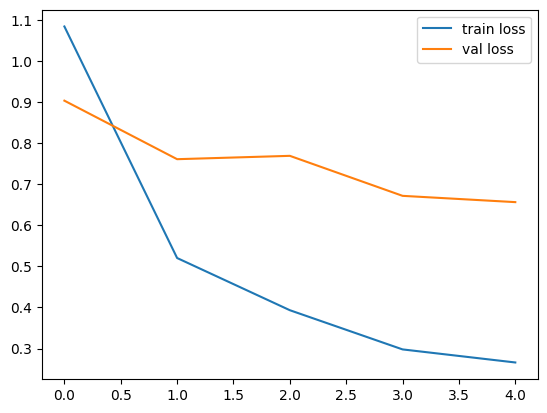

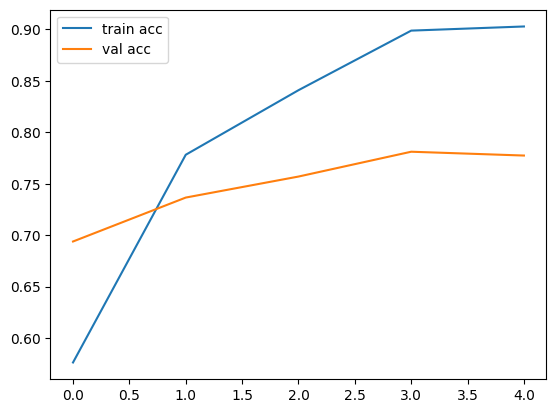

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/dataset/model/vgg16model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(test_set)

11/11 [==============================] - 8s 668ms/step


In [ ]:
y_pred

array([[7.21291644e-06, 9.93756413e-01, 6.23635389e-03],
       [4.93323058e-03, 4.12540406e-01, 5.82526386e-01],
       [1.76871326e-02, 2.32477874e-01, 7.49835014e-01],
       ...,
       [6.50727674e-02, 8.10796916e-01, 1.24130294e-01],
       [4.74746543e-04, 4.03879257e-03, 9.95486438e-01],
       [6.11433983e-01, 9.20494273e-02, 2.96516597e-01]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred
l=['Healthy', 'Red Rot', 'Red Rust']
for i in y_pred:
     print(l[i], end=' ')

Red Rot Red Rust Red Rust Red Rust Red Rust Red Rust Red Rot Red Rust Red Rust Red Rust Red Rust Red Rust Healthy Red Rot Red Rust Healthy Red Rot Healthy Healthy Healthy Red Rot Red Rot Red Rot Red Rot Red Rust Red Rust Red Rust Red Rust Healthy Healthy Red Rot Red Rust Healthy Red Rust Red Rust Red Rust Red Rust Healthy Red Rust Red Rot Red Rot Red Rot Red Rot Red Rot Healthy Red Rust Red Rot Red Rust Red Rot Red Rust Red Rot Healthy Red Rust Healthy Red Rust Red Rust Healthy Healthy Red Rot Red Rust Red Rust Healthy Red Rot Red Rust Healthy Red Rot Red Rot Red Rot Red Rot Red Rust Red Rot Healthy Healthy Red Rot Healthy Red Rust Healthy Red Rot Red Rot Red Rust Red Rust Red Rust Red Rust Red Rust Red Rot Red Rot Red Rust Red Rust Red Rust Red Rust Healthy Red Rust Healthy Red Rot Healthy Red Rust Healthy Red Rot Red Rot Red Rot Healthy Red Rot Healthy Red Rot Red Rust Red Rust Red Rust Healthy Red Rot Red Rust Healthy Red Rot Red Rust Red Rust Red Rot Red Rot Red Rot Healthy Red Rot

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
img=image.load_img('/content/drive/MyDrive/dataset/test_image___sugarcane__red-rot.jpeg',target_size=(224,224))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset/test_image___sugarcane__red-rot.jpeg'

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255
x

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf

In [ ]:
def model_predict(img_path, model):
    print(img_path)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x=x/255
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    l=['Healthy', 'Red Rot', 'Red Rust']
    print('Disease : ',l[int(preds)].upper())

In [ ]:
img_path=input('Enter the testing image path: ')
preds = model_predict(img_path, model)
preds

In [ ]:
''